(labs:cor32)=
# Interpolation

<hr>

## 📌 Commentaires pour les intervenants

<hr>

In [1]:
import numpy as np
import skimage.io as io
from numpy.linalg import norm
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.util import img_as_float, img_as_ubyte

In [2]:
# # Generate the image to use in this lab

# # Size of a square, size of the image
# S, N = 5, 20

# nx, ny = np.meshgrid(range(N), range(N))
# x = ((nx/S)%2>=1)*2-1
# y = ((ny/S)%2<1)*2-1
# img = (x*y+1)/2

# plt.figure()
# plt.imshow(img, "gray")
# plt.colorbar()
# plt.show()

# io.imsave("chess.png", img_as_ubyte(img))

In [3]:
def rot(img, step, order):
    # img   : image to rotate
    # step  : angle step
    # order : interpolation order
    
    # Number of rotation to perform
    I = 360//step
    
    # Subplots
    fig, axs = plt.subplots(1,I+1,figsize=(25,2))
        
    # Initial image (in float)
    x = img_as_float(img)
    y = x.copy()
    axs[0].imshow(x, "gray")
    axs[0].set_title("Original image")

    # Rotations
    for i in range(I):
        y = rotate(y, angle=step, order=order)
        axs[i+1].imshow(y, "gray")
        axs[i+1].set_title(f"{step*(i+1)}°")
    
    # Mean square error
    mse = norm(x-y, ord=2)
    print(f"Rotation with rotations of angle {step}° and {order}-order interpolation, MSE = {mse:.3f}:")
    
    plt.show()

In [4]:
# Load the image
img = io.imread("chess.png")

First, make rotations of angle 90° with a 0-order (nearest neighbour) interpolation.

Rotation with rotations of angle 90° and 0-order interpolation, MSE = 0.000:


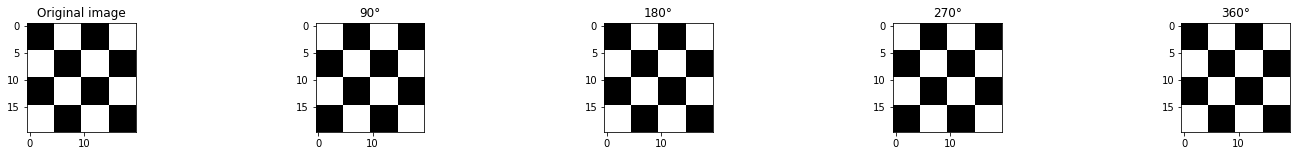

In [5]:
rot(img, 90, 0)

In this configuration, the mean square error (MSE) is zero, meaning that the interpolations made along the sequence of rotation are perfect,
_i.e._ the image is not changed.

Now, make rotations of angle 40°, with different interpolations (nearest neigbour, bilinear and bicubic).

Rotation with rotations of angle 40° and 0-order interpolation, MSE = 7.042:


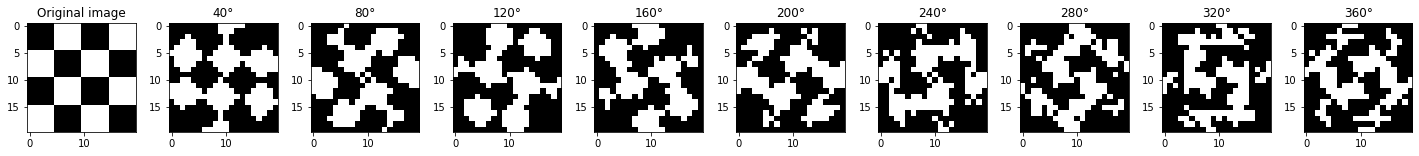

Rotation with rotations of angle 40° and 1-order interpolation, MSE = 7.094:


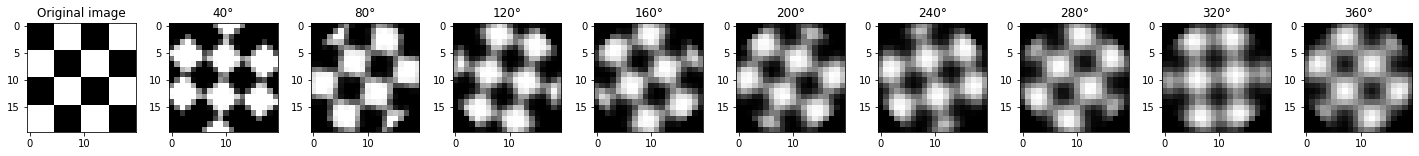

Rotation with rotations of angle 40° and 3-order interpolation, MSE = 5.661:


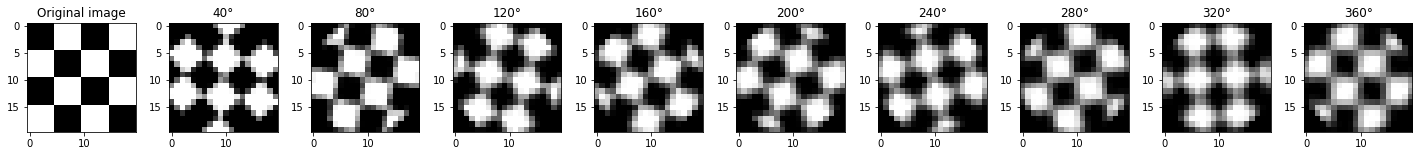

In [6]:
step = 40
rot(img, step, 0)
rot(img, step, 1)
rot(img, step, 3)

In this example, a visual inspection of the result (last image) clearly shows that the nearest-neigbour interpolation is not satisfactory.
This is confirmed by the MSE which is not the best MSE among the different results given by the interpolations.

In this example, the best interpolation is given by the bicubic interpolation.

Try to compare the results for different step angles, and different images!